# King County Housing Data Decision Tree Regression

The purpose of this notebook is to expand on the analysis of the Multiple Linear Regression notebook, do some further data pre-processing and use a decision tree regression rather than a multiple linear regression to check to see if a different regression method yields more accurate predictions

The first step is to load the data into a pandas DataFrame.

In [141]:
# A couple useful libraries, pandas for generating a data frame
import pandas as pd

# matplotlib for visualizations
import matplotlib.pyplot as plt

# numpy for crunching numbers, 
import numpy as np

# seaborn for some lines of best fit
import seaborn as sns

# regression related libaries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [142]:
# We can create our pandas data frame using the csv file in the shared directory
filename = "kc_house_data.csv"
data_frame = pd.read_csv(filename)

**Now we can double-check our data using the head() method to see the first 5 rows.**

In [143]:
# Pandas head() method shows us the top 5 rows for verification that the data is loaded
data_frame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let us do some housekeeping, first of all, we can add up sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15 & sqft_lot15 to get the total square feet of the house. We can also convert the bathroom and floors parameters into integers.

We can also choose the most recent date between yr_built and yr_renovated to create a year updated

In [144]:
# Sum all of the sqft space into one total sqft
data_frame['sqft_total'] = data_frame['sqft_living'] + data_frame['sqft_lot'] + data_frame['sqft_above'] + data_frame['sqft_basement'] + data_frame['sqft_living15'] + data_frame['sqft_lot15']

# Convert bathrooms into an integer as opposed to a float
data_frame['bathrooms'] = data_frame['bathrooms'].astype(int)

# Convert yr_built and yr_renovated columns to numpy
p1 = data_frame['yr_built'].to_numpy()
p2 = data_frame['yr_renovated'].to_numpy()

# Choose the later of the two dates and make it the yr_effective date
for i in range(0,21613):
    if(p2[i] > p1[i]):
        p1[i] = p2[i]

data_frame['yr_effective'] = p1

# Check the new data frame
data_frame

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total,yr_effective
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,15000,1955
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,400,1991,1991,98125,47.7210,-122.319,1690,7639,21711,1991
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,22322,1933
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,15280,1965
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,20743,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,7230,2009
21609,6600060120,20150223T000000,400000.0,4,2,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,19463,2014
21610,1523300141,20140623T000000,402101.0,2,0,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,6417,2009
21611,291310100,20150116T000000,400000.0,3,2,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,8285,2004


To remove some of the clutter, we can select only the relevant data to our analysis.

In [145]:
# Create a sub data frame containing the columns that might be of interest to us from the original data frame
sub_data_frame = data_frame[['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'sqft_total', 'yr_effective', 'lat', 'long']]

# Check the top 5 rows of our new sub data frame to double check our values
sub_data_frame.head()

,price,bedrooms,bathrooms,floors,waterfront,view,sqft_total,yr_effective,lat,long
0,221900.0,3,1,1.0,0,0,15000,1955,47.5112,-122.257
1,538000.0,3,2,2.0,0,0,21711,1991,47.7210,-122.319
2,180000.0,2,1,1.0,0,0,22322,1933,47.7379,-122.233
3,604000.0,4,3,1.0,0,0,15280,1965,47.5208,-122.393
4,510000.0,3,2,1.0,0,0,20743,1987,47.6168,-122.045


We can also quickly take a look at the describe method to check some of the statistics of the values of our new sub data frame.

In [156]:
# Use the built-in describe method to get a quick summary of the stats of our sub data frame
sub_data_frame.describe()

,price,bedrooms,bathrooms,floors,waterfront,view,sqft_total,yr_effective,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,1.494309,0.007542,0.234303,3.402178e+04,1973.386018,47.560053,-122.213896
std,3.671272e+05,0.930062,0.734873,0.539989,0.086517,0.766318,6.443590e+04,28.806854,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,3.881000e+03,1900.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.000000,1.000000,0.000000,0.000000,1.598100e+04,1954.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.000000,1.500000,0.000000,0.000000,2.111000e+04,1977.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.000000,2.000000,0.000000,0.000000,2.777000e+04,1999.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,3.500000,1.000000,4.000000,2.082100e+06,2015.000000,47.777600,-121.315000


In [147]:
# Set out axis values including the features we are interested in
x = sub_data_frame.iloc[:,1:10]
y = sub_data_frame['price']

# Now we can start spitting the data into train & test sets to evluate our model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=30)

# We can double check our test and train sets 
print("x_train length: " + str(len(x_train)))
print("y_train length: " + str(len(y_train)))
print("x_test length: " + str(len(x_test)))
print("y_test length: " + str(len(y_test)))

x_train length: 14480
y_train length: 14480
x_test length: 7133
y_test length: 7133


Now that we have verified that our test and train sets are of the right sizes, we can go ahead and instantiate our model and make predictions.

In [160]:
# Instantiate our model
tree_reg = DecisionTreeRegressor()

# Fit our model with the train data
tree_reg.fit(x_train, y_train)

# Make our predictions
y_pred = tree_reg.predict(x_test)


Now that we have loaded all of our predictions in y_pred, we can plot a histogram of the residuals and we can make sure it looks normally distributed.

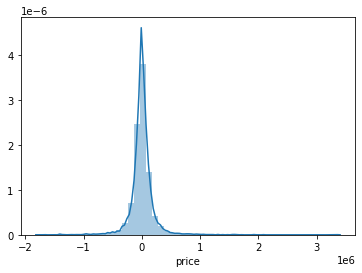

In [159]:
# Create a seaborn plot to check our residuals
sns.distplot((y_test-y_pred), bins = 50)

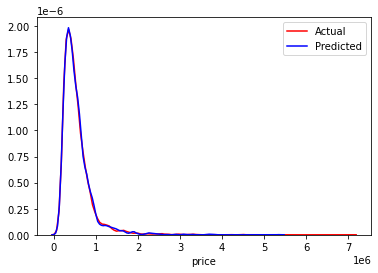

In [155]:
# Create another combined distplot to further illustrate the real and predicted prices
real_prices = sns.distplot(y_test, hist=False, color='r', label='Actual')
predicted_prices = sns.distplot(y_pred, hist=False, color='b', label='Predicted', ax=real_prices)

Note that our errors are normally distributed as wanted and we are done!